In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('train.tsv',header=0,delimiter='\t')  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [19]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [20]:
df.Sentiment.value_counts()/df.Sentiment.count()  

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2) 

[None]

In [22]:
plt.plot()
df.Sentiment.value_counts().plot(kind='bar')# 柱状图 

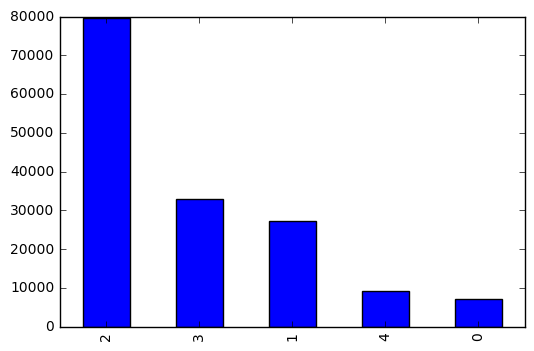

In [23]:
plt.show()

In [24]:
X_train = df['Phrase']  
y_train = df['Sentiment']  

In [10]:
import numpy as np  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.linear_model import LogisticRegression  

In [25]:
X_train.shape

(156060,)

In [26]:
vectorizer = CountVectorizer()

    #该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

    #第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(X_train))

In [28]:
tfidf.shape

(156060, 15240)

In [29]:
 word = vectorizer.get_feature_names()

In [30]:
tfidf.toarray

<bound method _cs_matrix.toarray of <156060x15240 sparse matrix of type '<class 'numpy.float64'>'
	with 972099 stored elements in Compressed Sparse Row format>>

In [31]:
clf =LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

In [32]:
clf.fit(tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [33]:
df_test = pd.read_csv('test.tsv',header=0,delimiter='\t')  

In [34]:
vectorizer_test = CountVectorizer(df_test["Phrase"])

    #该类会统计每个词语的tf-idf权值
transformerTEST = TfidfTransformer()

    #第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf_test = transformer.fit_transform(vectorizer.fit_transform(df_test["Phrase"]))

In [35]:
tfidf_test.shape

(66292, 9546)